# Fleet Selection Analytics
## Business Problem Statement
Fuel costs, heightened environmental concerns, and increasing customer demand for sustainable services have placed Zenith Logistics Services at a critical point in its operations. As a company providing both passenger and shipping services, continuous reliance on fossil-fuel-powered vehicles presents significant challenges. To remain competitive and meet its sustainability goals, Zenith Logistics is planning a transition to a fleet of electric vehicles (EVs) that aligns with the company's long-term objectives of **cost reduction, operational efficiency, and environmental obligations**. This electric-powered fleet would help position Zenith as a forward-thinking leader in logistics, appealing to environmentally conscious customers while complying with future regulatory standards.
### Project Objectives
1. **Identify and recommend the optimal fleet of electric vehicles (EVs)** for Zenith Logistics Services based on a combination of cost-effectiveness, operational efficiency, and sustainability goals.
2. **Develop and compare the performance of machine learning models** (Random Forest, Gradient Boosting, Decision Tree, and SVM) to predict key vehicle characteristics that impact operational outcomes such as range, acceleration, top speed, efficiency, and price.
3. **Analyze feature importance in tree-based models** (Random Forest, Gradient Boosting) to determine which vehicle characteristics (e.g., price, range, efficiency) have the most significant impact on the decision-making process for fleet selection.
4. **Provide insights on which features should be prioritized** when selecting vehicles, focusing on business, technical, and environmental factors.


In [156]:
# Import relevant libraries
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.svm import SVR
import plotly.express as px
import matplotlib.pyplot as pp
import plotly.graph_objs as go
from scipy.stats import ttest_ind
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
display(HTML("<style>.container { width:500% !important; }</style>"))

In [157]:
# load data
data = pd.read_csv(r'Ecar.csv',encoding='utf-8')
ecars =pd.DataFrame(data)
ecars

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


## Dataframe information
The dataframe contains 103 records and 14 columns. No missing values was detected. However, "Accel", "TopSpeed", "Range", "Efficiency", "FastCharge", and "RapidCharge" are detected as object data type instead of float. Thus, transformation is necessary to put them in their right format. the remaining features are however in the correct data types.

In [158]:
# Get info about the data
ecars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


## FastCharge Column
The "FastCharge" column contains inconsistency in the character "-"; thus, boolean mask was used to handle this inconsistency in order to obtain consistency in the string characters.


In [159]:
# Mask the 'FastCharge' column for easy conversion
mask = ecars['FastCharge'].astype(str).str.contains('-')
ecars = ecars[~mask]
ecars

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


In [160]:
# Extend the conversion to other columns
ecars['Accelaration (sec)'] = ecars['Accel'].str.replace('sec','').astype(float)
ecars['TopSpeed (km/hr)'] = ecars['TopSpeed'].str.replace('km/h','').astype(float)
ecars['Range (km)'] = ecars['Range'].str.replace('km','').astype(float)
ecars['Efficiency (Wh/km)'] = ecars['Efficiency'].str.replace('Wh/km','').astype(float)
ecars['FastCharge (km/hr)'] = ecars['FastCharge'].astype(str).str.replace('km/h','').astype(float)
ecars['Price (€)'] = ecars['PriceEuro']
ecars

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,Accelaration (sec),TopSpeed (km/hr),Range (km),Efficiency (Wh/km),FastCharge (km/hr),Price (€)
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480,4.6,233.0,450.0,161.0,940.0,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000,10.0,160.0,270.0,167.0,250.0,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440,4.7,210.0,400.0,181.0,620.0,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040,6.8,180.0,360.0,206.0,560.0,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997,9.5,145.0,170.0,168.0,190.0,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000,7.5,160.0,330.0,191.0,440.0,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050,4.5,210.0,335.0,258.0,540.0,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000,5.9,200.0,325.0,194.0,440.0,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000,5.1,200.0,375.0,232.0,450.0,65000


In [161]:
# Delete extraneous columns or columns not labeled appropriately
ecars.drop(columns = ['Accel','Efficiency','TopSpeed','Range','FastCharge','PriceEuro'], axis =1, inplace = True)
ecars

,Brand,Model,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,Accelaration (sec),TopSpeed (km/hr),Range (km),Efficiency (Wh/km),FastCharge (km/hr),Price (€)
0,Tesla,Model 3 Long Range Dual Motor,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,4.6,233.0,450.0,161.0,940.0,55480
1,Volkswagen,ID.3 Pure,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,10.0,160.0,270.0,167.0,250.0,30000
2,Polestar,2,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,4.7,210.0,400.0,181.0,620.0,56440
3,BMW,iX3,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,6.8,180.0,360.0,206.0,560.0,68040
4,Honda,e,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,9.5,145.0,170.0,168.0,190.0,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,7.5,160.0,330.0,191.0,440.0,45000
99,Audi,e-tron S Sportback 55 quattro,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,4.5,210.0,335.0,258.0,540.0,96050
100,Nissan,Ariya e-4ORCE 63kWh,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,5.9,200.0,325.0,194.0,440.0,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,5.1,200.0,375.0,232.0,450.0,65000


## Summary Stats
The average values are quite close to the median values for "Accelaration","FastCharge" and "Efficiency" depicting somewhat normal distribution, while the other columns showed great discrepancy between their average and median values depicting somewhat skewed distribution. Among other features, accelaration enjoys the lowest standard deviation, greatly contrasting the "Price" column which has the largest standard deviation.

In [162]:
# Obtain descriptive statistics for numeric columns, excluding the 'Seats' column.
round(ecars.drop(columns = ['Seats']).describe(),2)

,Accelaration (sec),TopSpeed (km/hr),Range (km),Efficiency (Wh/km),FastCharge (km/hr),Price (€)
count,98.00,98.00,98.00,98.00,98.00,98.00
mean,7.05,181.65,350.15,189.87,456.73,57324.68
std,2.48,43.25,118.22,30.06,201.26,34288.25
min,2.10,123.00,170.00,104.00,170.00,20129.00
25%,5.10,150.00,258.75,168.00,275.00,35000.00
50%,7.30,167.00,350.00,181.00,440.00,45000.00
75%,8.95,200.00,407.50,206.00,560.00,65465.00
max,14.00,410.00,970.00,273.00,940.00,215000.00


In [163]:
# Create a dataframe containing vehicle features by brand and model
Brands = ecars.groupby(['Brand', 'Model'], as_index=False)[
    ['Accelaration (sec)', 'TopSpeed (km/hr)', 'Range (km)', 
     'Efficiency (Wh/km)', 'FastCharge (km/hr)', 'Price (€)']
].mean().round(2)
Brands= Brands.sort_values(by='Price (€)', ascending=False, ignore_index=True)
Brands

,Brand,Model,Accelaration (sec),TopSpeed (km/hr),Range (km),Efficiency (Wh/km),FastCharge (km/hr),Price (€)
0,Tesla,Roadster,2.1,410.0,970.0,206.0,920.0,215000.0
1,Porsche,Taycan Turbo S,2.8,260.0,375.0,223.0,780.0,180781.0
2,Porsche,Taycan Cross Turismo,3.5,250.0,385.0,217.0,770.0,150000.0
3,Lightyear,One,10.0,150.0,575.0,104.0,540.0,149000.0
4,Porsche,Taycan Turbo,3.2,260.0,390.0,215.0,810.0,148301.0
...,...,...,...,...,...,...,...,...
92,Opel,Corsa-e,8.1,150.0,275.0,164.0,420.0,29146.0
93,Sono,Sion,9.0,140.0,225.0,156.0,270.0,25500.0
94,Skoda,CITIGOe iV,12.3,130.0,195.0,166.0,170.0,24534.0
95,Volkswagen,e-Up!,11.9,130.0,195.0,166.0,170.0,21421.0


In [164]:
# Categorize 'price' into specified bins
price_range = [0, 50000, 100000, 150000, 200000, 250000]
pricerange = ['0-49999', '50000-99999', '100000-149999','150000-199999','200000-249999']
Brands['PriceRange'] = pd.cut(Brands['Price (€)'], bins=price_range, labels=pricerange)
Brands

,Brand,Model,Accelaration (sec),TopSpeed (km/hr),Range (km),Efficiency (Wh/km),FastCharge (km/hr),Price (€),PriceRange
0,Tesla,Roadster,2.1,410.0,970.0,206.0,920.0,215000.0,200000-249999
1,Porsche,Taycan Turbo S,2.8,260.0,375.0,223.0,780.0,180781.0,150000-199999
2,Porsche,Taycan Cross Turismo,3.5,250.0,385.0,217.0,770.0,150000.0,100000-149999
3,Lightyear,One,10.0,150.0,575.0,104.0,540.0,149000.0,100000-149999
4,Porsche,Taycan Turbo,3.2,260.0,390.0,215.0,810.0,148301.0,100000-149999
...,...,...,...,...,...,...,...,...,...
92,Opel,Corsa-e,8.1,150.0,275.0,164.0,420.0,29146.0,0-49999
93,Sono,Sion,9.0,140.0,225.0,156.0,270.0,25500.0,0-49999
94,Skoda,CITIGOe iV,12.3,130.0,195.0,166.0,170.0,24534.0,0-49999
95,Volkswagen,e-Up!,11.9,130.0,195.0,166.0,170.0,21421.0,0-49999


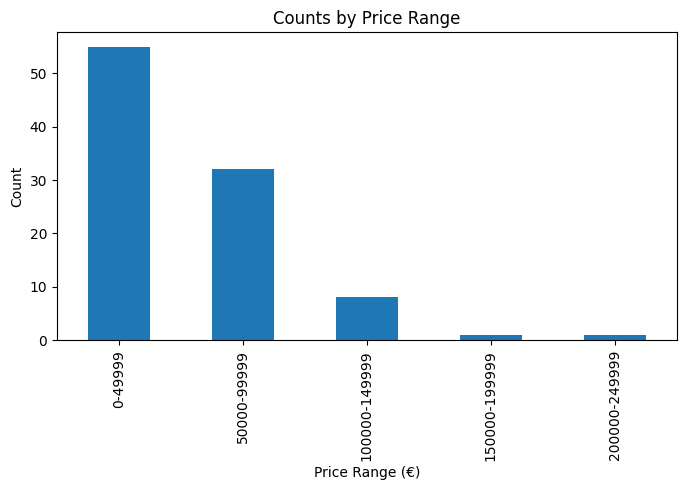

In [165]:
# Visualize the groupings with a bar 
pp.figure(figsize=(8,4))
Brands['PriceRange'].value_counts().plot(kind='bar')
pp.xlabel('Price Range (€)')
pp.ylabel('Count')
pp.title('Counts by Price Range')
pp.show()

In [166]:
# Aggregate statistics for group 1
round(Brands[Brands['PriceRange'] == '20000-60000'].agg(['count','mean', 'std']),2)

,Brand,Model,Accelaration (sec),TopSpeed (km/hr),Range (km),Efficiency (Wh/km),FastCharge (km/hr),Price (€),PriceRange
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
# Aggregate statistics for group 2
round(Brands[Brands['PriceRange'] == '60000-100000'].agg(['count','mean', 'std']),2)

,Brand,Model,Accelaration (sec),TopSpeed (km/hr),Range (km),Efficiency (Wh/km),FastCharge (km/hr),Price (€),PriceRange
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
# Aggregate statistics for group 3
round(Brands[Brands['PriceRange'] == '100000-150000'].agg(['count','mean', 'std']),2)

,Brand,Model,Accelaration (sec),TopSpeed (km/hr),Range (km),Efficiency (Wh/km),FastCharge (km/hr),Price (€),PriceRange
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
# Perform t-test to determine if there is any statistically significant difference among the 3 groups
price_range = [20000, 60000, 100000, 150000]
pricerange = ['20000-60000', '60000-100000', '100000-150000']
Brands['PriceRange'] = pd.cut(Brands['Price (€)'], bins=price_range, labels=pricerange)

pricerange1 = Brands[Brands['PriceRange'] == '20000-60000']['Price (€)']
pricerange2 = Brands[Brands['PriceRange'] == '60000-100000']['Price (€)']
pricerange3 = Brands[Brands['PriceRange'] == '100000-150000']['Price (€)']

# Perform t-test between the three groups
t_statistic, p_value = ttest_ind(pricerange1, pricerange2)
freedeg1 = (len(pricerange1)+len(pricerange2))-2
print(f'T-test between Group 1 and Group 2:\nT-statistic: {round(t_statistic,2)}, P-value: {p_value}, Degree of freedom2:{freedeg1}')

t_statistic, p_value = ttest_ind(pricerange1, pricerange3)
freedeg2 = (len(pricerange1)+len(pricerange3))-2
print(f'T-test between Group 1 and Group 3:\nT-statistic: {round(t_statistic,2)}, P-value: {p_value}, Degree of freedom2:{freedeg2}')

t_statistic, p_value = ttest_ind(pricerange2, pricerange3)
freedeg3 = (len(pricerange2)+len(pricerange3))-2
print(f'T-test between Group 2 and Group 3:\nT-statistic: {round(t_statistic,2)}, P-value: {round(p_value,3)}, Degree of freedom:{freedeg3}')

T-test between Group 1 and Group 2:
T-statistic: -13.71, P-value: 3.0559205300744683e-23, Degree of freedom2:85
T-test between Group 1 and Group 3:
T-statistic: -19.9, P-value: 9.427357898891583e-31, Degree of freedom2:71
T-test between Group 2 and Group 3:
T-statistic: -8.31, P-value: 0.0, Degree of freedom:28


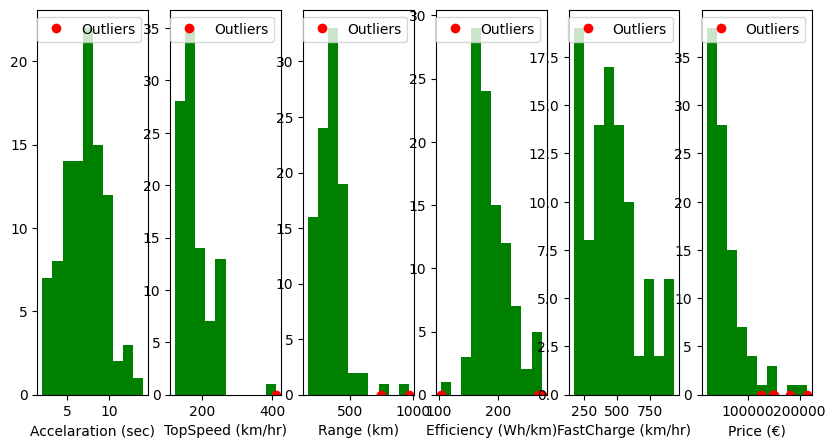

In [170]:
# Make histogram plots for the numeric variables or features
variables = ['Accelaration (sec)','TopSpeed (km/hr)','Range (km)',
             'Efficiency (Wh/km)','FastCharge (km/hr)','Price (€)']
fig, axs = pp.subplots(nrows=1, ncols=len(variables), figsize=(10, 5))
for i, variable in enumerate(variables):
    data = ecars[variable]
    axs[i].hist(data, bins=10, color='green')
    median = data.median()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    axs[i].plot(outliers, [0] * len(outliers), 'ro', label='Outliers')
    axs[i].set_xlabel(variable)
    axs[i].legend()
pp.show()

In [171]:
# Match vehicles with the power train system
powertrain = round(ecars.groupby('PowerTrain',as_index = False)
                  [['Accelaration (sec)','TopSpeed (km/hr)','Range (km)','Efficiency (Wh/km)','FastCharge (km/hr)','Price (€)']].mean(),2)
powertrain

,PowerTrain,Accelaration (sec),TopSpeed (km/hr),Range (km),Efficiency (Wh/km),FastCharge (km/hr),Price (€)
0,All Wheel Drive,4.89,216.90,426.46,206.76,605.85,83840.10
1,Front Wheel Drive,9.18,149.28,271.25,175.06,293.06,35322.81
2,Rear Wheel Drive,7.61,168.33,336.43,182.29,446.19,43274.00


In [172]:
# Subset the ecars dataframe by extracting only the required columns
cols = ['Accelaration (sec)','TopSpeed (km/hr)','Range (km)','Efficiency (Wh/km)','FastCharge (km/hr)','Seats','Price (€)']
num_ecar = ecars[cols]
num_ecar

,Accelaration (sec),TopSpeed (km/hr),Range (km),Efficiency (Wh/km),FastCharge (km/hr),Seats,Price (€)
0,4.6,233.0,450.0,161.0,940.0,5,55480
1,10.0,160.0,270.0,167.0,250.0,5,30000
2,4.7,210.0,400.0,181.0,620.0,5,56440
3,6.8,180.0,360.0,206.0,560.0,5,68040
4,9.5,145.0,170.0,168.0,190.0,4,32997
...,...,...,...,...,...,...,...
98,7.5,160.0,330.0,191.0,440.0,5,45000
99,4.5,210.0,335.0,258.0,540.0,5,96050
100,5.9,200.0,325.0,194.0,440.0,5,50000
101,5.1,200.0,375.0,232.0,450.0,5,65000


In [173]:
# Perform normalization
scaler = MinMaxScaler()
norm_ecars = pd.DataFrame(scaler.fit_transform(num_ecar),columns = cols)
norm_ecars

,Accelaration (sec),TopSpeed (km/hr),Range (km),Efficiency (Wh/km),FastCharge (km/hr),Seats,Price (€)
0,0.210084,0.383275,0.35000,0.337278,1.000000,0.333333,0.181407
1,0.663866,0.128920,0.12500,0.372781,0.103896,0.333333,0.050654
2,0.218487,0.303136,0.28750,0.455621,0.584416,0.333333,0.186334
3,0.394958,0.198606,0.23750,0.603550,0.506494,0.333333,0.245860
4,0.621849,0.076655,0.00000,0.378698,0.025974,0.000000,0.066033
...,...,...,...,...,...,...,...
93,0.453782,0.128920,0.20000,0.514793,0.350649,0.333333,0.127628
94,0.201681,0.303136,0.20625,0.911243,0.480519,0.333333,0.389596
95,0.319328,0.268293,0.19375,0.532544,0.350649,0.333333,0.153286
96,0.252101,0.268293,0.25625,0.757396,0.363636,0.333333,0.230260


In [174]:
# Create a new dataframe by adding powertain and branmodel columns to the normalized dataset
ecars['BrandModel'] = ecars['Brand'].str.cat(ecars['Model'],sep = ' ')
merged = pd.merge(ecars[['BrandModel','PowerTrain']], 
norm_ecars, left_index=True, right_index=True)
merged['BrandModel_PowerTrain'] = merged['BrandModel'].str.cat(ecars['PowerTrain'],sep=': ')
merged

,BrandModel,PowerTrain,Accelaration (sec),TopSpeed (km/hr),Range (km),Efficiency (Wh/km),FastCharge (km/hr),Seats,Price (€),BrandModel_PowerTrain
0,Tesla Model 3 Long Range Dual Motor,All Wheel Drive,0.210084,0.383275,0.35000,0.337278,1.000000,0.333333,0.181407,Tesla Model 3 Long Range Dual Motor: All Whee...
1,Volkswagen ID.3 Pure,Rear Wheel Drive,0.663866,0.128920,0.12500,0.372781,0.103896,0.333333,0.050654,Volkswagen ID.3 Pure: Rear Wheel Drive
2,Polestar 2,All Wheel Drive,0.218487,0.303136,0.28750,0.455621,0.584416,0.333333,0.186334,Polestar 2: All Wheel Drive
3,BMW iX3,Rear Wheel Drive,0.394958,0.198606,0.23750,0.603550,0.506494,0.333333,0.245860,BMW iX3 : Rear Wheel Drive
4,Honda e,Rear Wheel Drive,0.621849,0.076655,0.00000,0.378698,0.025974,0.000000,0.066033,Honda e : Rear Wheel Drive
...,...,...,...,...,...,...,...,...,...,...
93,Nissan Ariya e-4ORCE 87kWh,All Wheel Drive,0.453782,0.128920,0.20000,0.514793,0.350649,0.333333,0.127628,Nissan Ariya e-4ORCE 87kWh: All Wheel Drive
94,Fiat 500e Convertible,Front Wheel Drive,0.201681,0.303136,0.20625,0.911243,0.480519,0.333333,0.389596,Fiat 500e Convertible: Front Wheel Drive
95,Volkswagen ID.3 Pro Performance,Rear Wheel Drive,0.319328,0.268293,0.19375,0.532544,0.350649,0.333333,0.153286,Volkswagen ID.3 Pro Performance: Rear Wheel D...
96,Kia e-Soul 39 kWh,Front Wheel Drive,0.252101,0.268293,0.25625,0.757396,0.363636,0.333333,0.230260,Kia e-Soul 39 kWh: Front Wheel Drive


In [175]:
# Rearrange for a smooth mental flow
merged = pd.merge(ecars[['BrandModel','PowerTrain']], 
norm_ecars, left_index=True, right_index=True)
merged 

,BrandModel,PowerTrain,Accelaration (sec),TopSpeed (km/hr),Range (km),Efficiency (Wh/km),FastCharge (km/hr),Seats,Price (€)
0,Tesla Model 3 Long Range Dual Motor,All Wheel Drive,0.210084,0.383275,0.35000,0.337278,1.000000,0.333333,0.181407
1,Volkswagen ID.3 Pure,Rear Wheel Drive,0.663866,0.128920,0.12500,0.372781,0.103896,0.333333,0.050654
2,Polestar 2,All Wheel Drive,0.218487,0.303136,0.28750,0.455621,0.584416,0.333333,0.186334
3,BMW iX3,Rear Wheel Drive,0.394958,0.198606,0.23750,0.603550,0.506494,0.333333,0.245860
4,Honda e,Rear Wheel Drive,0.621849,0.076655,0.00000,0.378698,0.025974,0.000000,0.066033
...,...,...,...,...,...,...,...,...,...
93,Nissan Ariya e-4ORCE 87kWh,All Wheel Drive,0.453782,0.128920,0.20000,0.514793,0.350649,0.333333,0.127628
94,Fiat 500e Convertible,Front Wheel Drive,0.201681,0.303136,0.20625,0.911243,0.480519,0.333333,0.389596
95,Volkswagen ID.3 Pro Performance,Rear Wheel Drive,0.319328,0.268293,0.19375,0.532544,0.350649,0.333333,0.153286
96,Kia e-Soul 39 kWh,Front Wheel Drive,0.252101,0.268293,0.25625,0.757396,0.363636,0.333333,0.230260


In [176]:
# Get correlation matrix to display correlation values among features
corrmatrix = norm_ecars.corr()
corrmatrix

,Accelaration (sec),TopSpeed (km/hr),Range (km),Efficiency (Wh/km),FastCharge (km/hr),Seats,Price (€)
Accelaration (sec),1.000000,-0.844706,-0.656763,-0.439087,-0.768397,-0.046564,-0.683177
TopSpeed (km/hr),-0.844706,1.000000,0.729297,0.343488,0.769719,0.023792,0.822229
Range (km),-0.656763,0.729297,1.000000,0.296230,0.698120,0.154212,0.662957
Efficiency (Wh/km),-0.439087,0.343488,0.296230,1.000000,0.307342,0.290138,0.384342
FastCharge (km/hr),-0.768397,0.769719,0.698120,0.307342,1.000000,0.096641,0.651613
Seats,-0.046564,0.023792,0.154212,0.290138,0.096641,1.000000,-0.086514
Price (€),-0.683177,0.822229,0.662957,0.384342,0.651613,-0.086514,1.000000


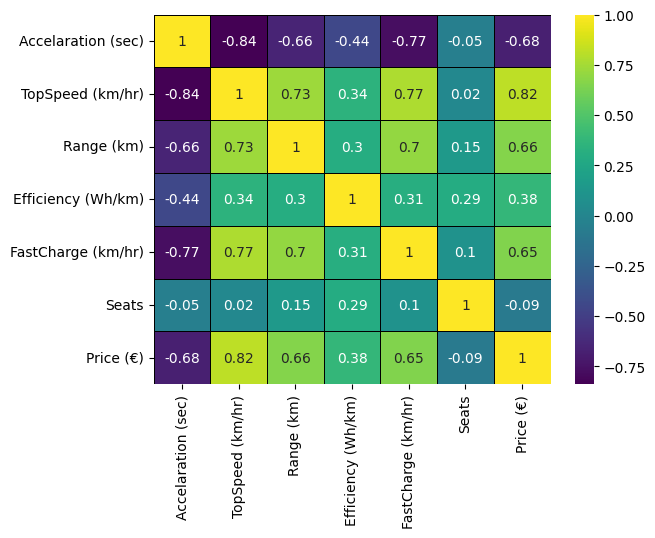

In [177]:
# Visualize the correlation values
sns.heatmap(round(corrmatrix,2),annot=True,cmap='viridis',linewidths=0.7,linecolor='black')
pp.show()

In [179]:
# Define the criteria based on the normalization figures
Range_criteria = [(0.76,1.0,4),(0.51,0.75,3),(0.26,0.50,2),(0.1,0.25,1)]
Acceleration_criteria = [(0.1,0.25,4),(0.26,0.50,3),(0.51,0.75,2),(0.76,1.0,1)]
TopSpeed_criteria = [(0.76,1.0,4),(0.51,0.75,3),(0.26,0.50,2),(0.1,0.25,1)]
Price_criteria = [(0.1,0.25,4),(0.26,0.50,3),(0.51,0.75,2),(0.76,1.0,1)]
FastCharge_criteria = [(0.76,1.0,4),(0.51,0.75,3),(0.26,0.50,2),(0.1,0.25,1)]
Efficiency_criteria = [(0.76,1.0,4),(0.51,0.75,3),(0.26,0.50,2),(0.1,0.25,1)]
Seats_criteria = [(0.76,1.0,4),(0.51,0.75,3),(0.26,0.50,2),(0.1,0.25,1)]
def get_score(value, criteria):
    for c in criteria:
        if value >= c[0] and value <= c[1]:
            return c[2]
    return 0
scores = []
for i, row in norm_ecars.iterrows():
    Range_score = get_score(row["Range (km)"], Range_criteria)
    Price_score = get_score(row["Price (€)"], Price_criteria)
    FastCharge_score = get_score(row["FastCharge (km/hr)"], FastCharge_criteria)
    Acceleration_score = get_score(row["Accelaration (sec)"], Acceleration_criteria)
    TopSpeed_score = get_score(row["TopSpeed (km/hr)"], TopSpeed_criteria)
    Efficiency_score = get_score(row["Efficiency (Wh/km)"], Efficiency_criteria)
    Seats_score = get_score(row["Seats"], Seats_criteria)
    total_score = Range_score + Acceleration_score + TopSpeed_score + Price_score + FastCharge_score + Efficiency_score + Seats_score
    scores.append(total_score)
norm_ecars["Score"] = scores
norm_ecars

,Accelaration (sec),TopSpeed (km/hr),Range (km),Efficiency (Wh/km),FastCharge (km/hr),Seats,Price (€),Score
0,0.210084,0.383275,0.35000,0.337278,1.000000,0.333333,0.181407,20
1,0.663866,0.128920,0.12500,0.372781,0.103896,0.333333,0.050654,9
2,0.218487,0.303136,0.28750,0.455621,0.584416,0.333333,0.186334,19
3,0.394958,0.198606,0.23750,0.603550,0.506494,0.333333,0.245860,14
4,0.621849,0.076655,0.00000,0.378698,0.025974,0.000000,0.066033,4
...,...,...,...,...,...,...,...,...
93,0.453782,0.128920,0.20000,0.514793,0.350649,0.333333,0.127628,16
94,0.201681,0.303136,0.20625,0.911243,0.480519,0.333333,0.389596,18
95,0.319328,0.268293,0.19375,0.532544,0.350649,0.333333,0.153286,17
96,0.252101,0.268293,0.25625,0.757396,0.363636,0.333333,0.230260,10


In [188]:
# Function to fit and evaluate a model with cross-validation and plot decision tree
def model_evaluation(model_name, model, norm_ecars, target, features):
    df_copy = norm_ecars.copy()
    X = df_copy[features]
    y = df_copy[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = round(r2_score(y_test, y_pred), 2)
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    mse = round(mean_squared_error(y_test, y_pred), 2)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_mean = round(np.mean(cv_scores), 2)
    # Visualize actual vs predicted results
    pp.scatter(y_test, y_pred)
    pp.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
    pp.xlabel('Actual Score')
    pp.ylabel('Predicted Score')
    pp.title(f'{model_name} Model')
    pp.show()
    # Plot decision tree if it's a DecisionTreeRegressor or a tree-based model
    if isinstance(model, DecisionTreeRegressor):
        pp.figure(figsize=(20,10))
        plot_tree(model, feature_names=features, filled=True, rounded=True)
        pp.title(f'Decision Tree for {model_name}')
        pp.show()
    elif isinstance(model, RandomForestRegressor):
        pp.figure(figsize=(20,10))
        plot_tree(model.estimators_[0], feature_names=features, filled=True, rounded=True)
        pp.title(f'One Decision Tree from Random Forest for {model_name}')
        pp.show()
    return pd.DataFrame({
        'Model': [model_name],
        'R-squared': [r2],
        'Cross-validated R-squared': [cv_mean],
        'MAE': [mae],
        'MSE': [mse]})

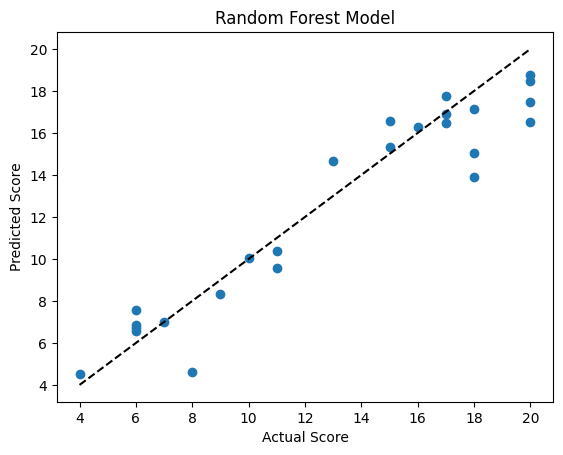

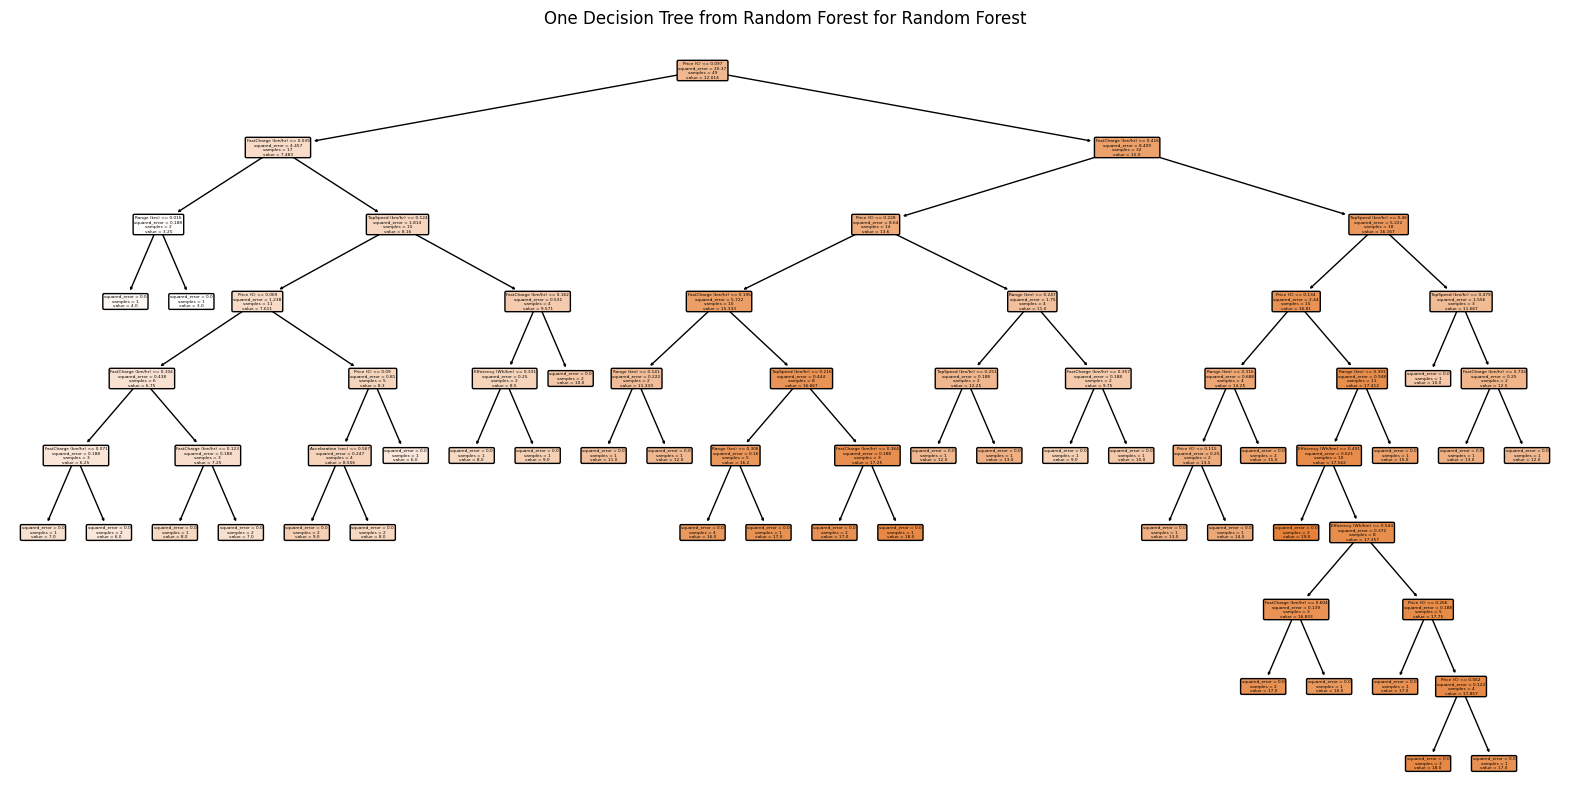

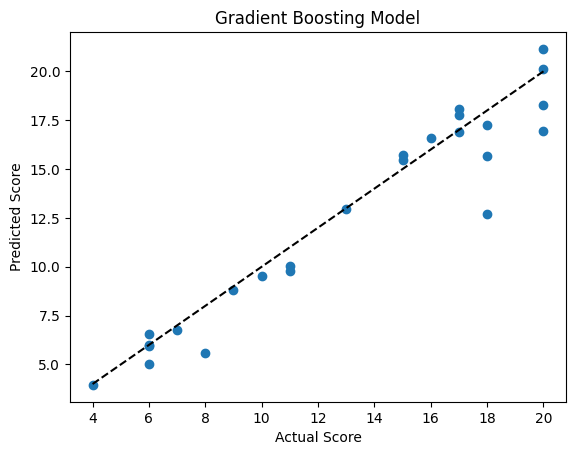

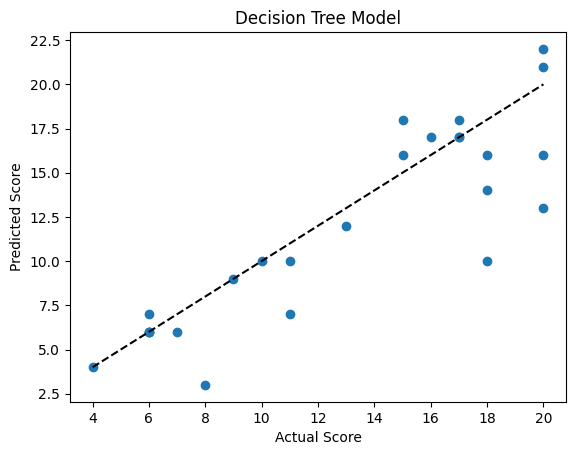

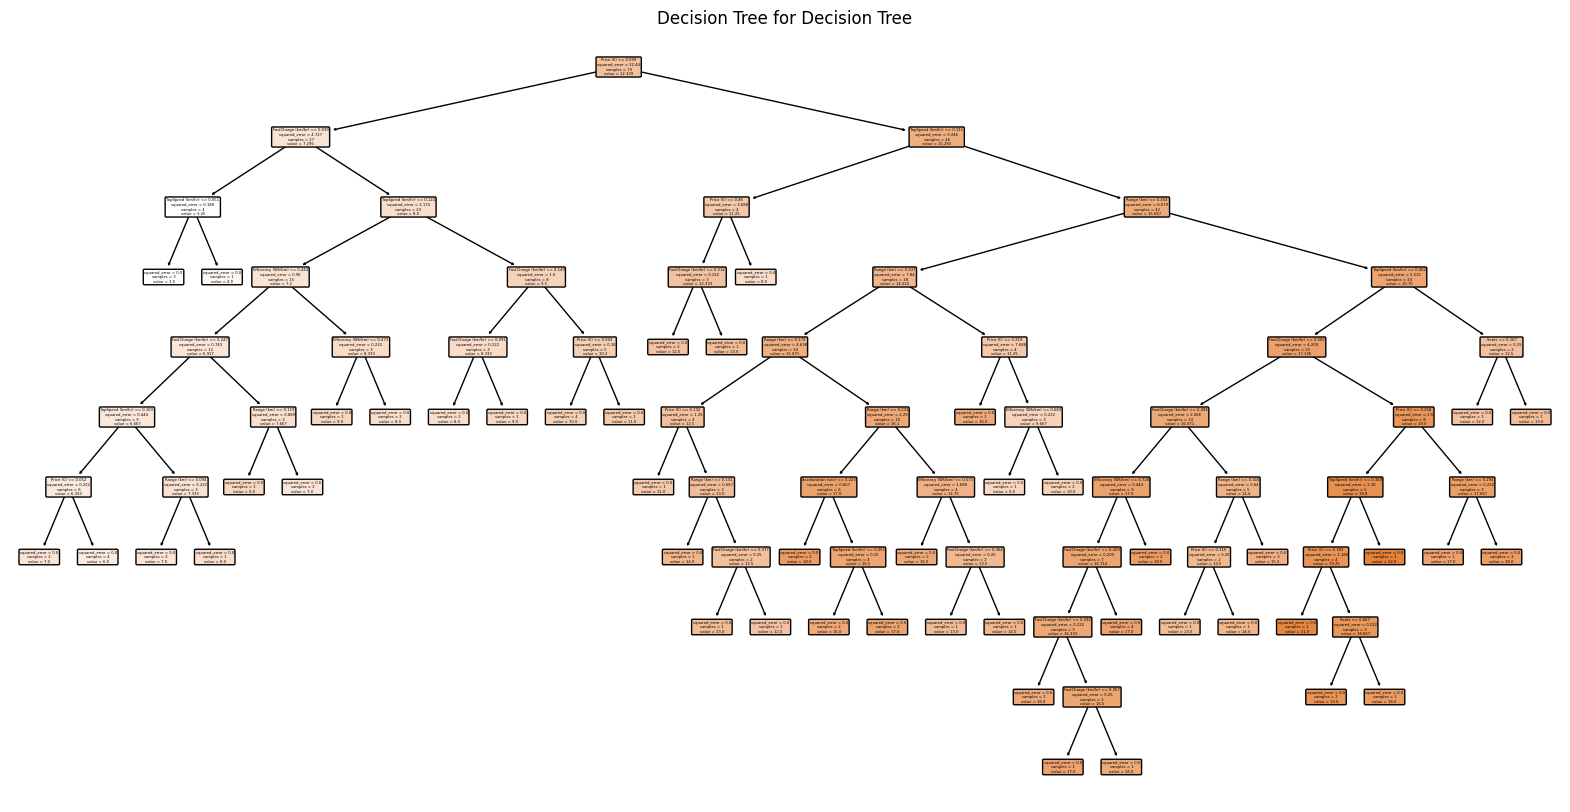

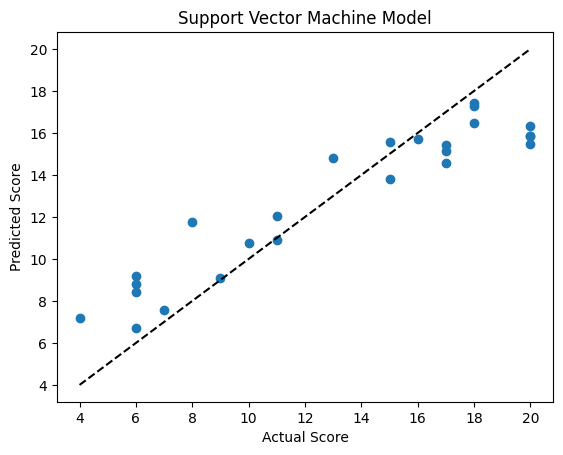

,Model,R-squared,Cross-validated R-squared,MAE,MSE
0,Random Forest,0.90,0.81,1.29,2.92
1,Gradient Boosting,0.91,0.85,1.01,2.41
2,Decision Tree,0.70,0.48,1.88,8.44
3,Support Vector Machine,0.80,0.67,1.90,5.57


In [189]:
 # Define the features and target columns and models to evaluate
target_column = 'Score'
feature_columns = ['Price (€)', 'Range (km)', 'Accelaration (sec)', 'Efficiency (Wh/km)', 
                   'Seats', 'TopSpeed (km/hr)', 'FastCharge (km/hr)']
models = {
    'Random Forest': RandomForestRegressor(n_estimators=1000, random_state=123),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=1000, random_state=123),
    'Decision Tree': DecisionTreeRegressor(random_state=123),
    'Support Vector Machine': SVR()}
results_df = pd.DataFrame()
for model_name, model in models.items():
    result = model_evaluation(model_name, model, norm_ecars.copy(), target_column, feature_columns)
    results_df = pd.concat([results_df, result], ignore_index=True)
results_df

In [190]:
# Assign the dataframe with scores to a new dataframe called 'merged_sorted' and sort in descending order
merged['Score'] = norm_ecars['Score']
merged_sorted = merged.sort_values('Score', ascending=False,ignore_index=True)
merged_sorted

,BrandModel,PowerTrain,Accelaration (sec),TopSpeed (km/hr),Range (km),Efficiency (Wh/km),FastCharge (km/hr),Seats,Price (€),Score
0,Renault Zoe ZE40 R110,Front Wheel Drive,0.134454,0.411150,0.30000,0.431953,0.948052,1.000000,0.233442,22
1,Nissan e-NV200 Evalia,Front Wheel Drive,0.243697,0.233449,0.36250,0.928994,0.701299,0.666667,0.178944,21
2,Tesla Model 3 Long Range Dual Motor,All Wheel Drive,0.210084,0.383275,0.35000,0.337278,1.000000,0.333333,0.181407,20
3,Tesla Model X Long Range,All Wheel Drive,0.210084,0.442509,0.35000,0.633136,0.415584,1.000000,0.337972,20
4,Tesla Model 3 Long Range Performance,All Wheel Drive,0.109244,0.480836,0.33125,0.372781,0.961039,0.333333,0.212197,20
...,...,...,...,...,...,...,...,...,...,...
88,Honda e Advance,Rear Wheel Drive,0.521008,0.076655,0.00000,0.378698,0.025974,0.000000,0.081038,4
89,Honda e,Rear Wheel Drive,0.621849,0.076655,0.00000,0.378698,0.025974,0.000000,0.066033,4
90,SEAT Mii Electric,Front Wheel Drive,0.857143,0.024390,0.03125,0.366864,0.000000,0.000000,0.000000,3
91,Skoda CITIGOe iV,Front Wheel Drive,0.857143,0.024390,0.03125,0.366864,0.000000,0.000000,0.022605,3


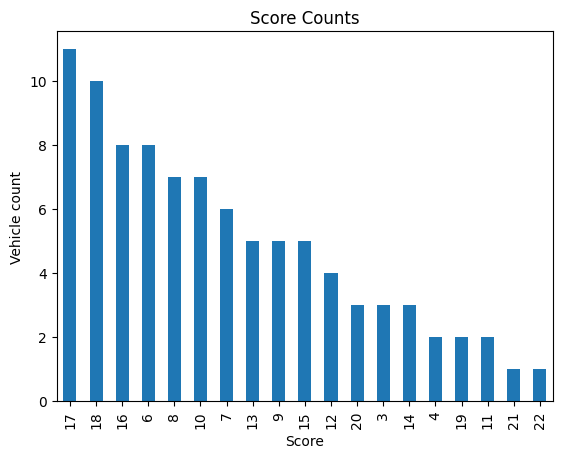

In [191]:
# Visualize the new dataframe
merged_sorted.value_counts('Score').plot(kind = 'bar')
pp.ylabel('Vehicle count')
pp.title('Score Counts')
pp.show()

In [192]:
# Check the ratio of vehicles that failed to meet the criteria to that of vehicles that met the stipulated criteria. 
round(merged['Score'].isin([17,18]).value_counts('Score'),2)

False    0.77
True     0.23
Name: Score, dtype: float64

In [193]:
# Check the ratio of vehicles that failed to meet the criteria to that of vehicles that met the stipulated criteria. 
round(merged['Score'].isin([21,22]).value_counts('Score'),2)

False    0.98
True     0.02
Name: Score, dtype: float64

In [194]:
# Extract only records that meet scores of 17 and 18
condition = merged['Score'].isin([17,18])
desired_cols =  ['BrandModel','PowerTrain','Price (€)','Range (km)','Accelaration (sec)','Seats',
                 'Efficiency (Wh/km)','TopSpeed (km/hr)','FastCharge (km/hr)','Score']
slct_flt = merged[condition][desired_cols]
slct_flt.sort_values('Score',ignore_index=True,inplace=True,ascending=False)
slct_flt

,BrandModel,PowerTrain,Price (€),Range (km),Accelaration (sec),Seats,Efficiency (Wh/km),TopSpeed (km/hr),FastCharge (km/hr),Score
0,Ford Mustang Mach-E ER RWD,Rear Wheel Drive,0.457600,0.31875,0.159664,0.000000,0.550296,0.442509,0.935065,18
1,Audi e-tron 55 quattro,All Wheel Drive,0.304386,0.24375,0.302521,0.333333,0.786982,0.268293,0.545455,18
2,Fiat 500e Convertible,Front Wheel Drive,0.389596,0.20625,0.201681,0.333333,0.911243,0.303136,0.480519,18
3,Skoda Enyaq iV vRS,All Wheel Drive,0.191773,0.31250,0.302521,0.333333,0.609467,0.268293,0.428571,18
4,Tesla Cybertruck Single Motor,Rear Wheel Drive,0.378050,0.18750,0.201681,0.333333,0.982249,0.303136,0.441558,18
5,Skoda Enyaq iV 80X,All Wheel Drive,0.225128,0.27500,0.285714,0.333333,0.828402,0.233449,0.376623,18
6,Byton M-Byte 72 kWh 2WD,Rear Wheel Drive,0.214865,0.28750,0.453782,0.333333,0.792899,0.233449,0.402597,18
7,Audi e-tron Sportback 55 quattro,All Wheel Drive,0.315645,0.26250,0.302521,0.333333,0.733728,0.268293,0.571429,18
8,Tesla Cybertruck Tri Motor,All Wheel Drive,0.281576,0.72500,0.075630,0.666667,0.964497,0.303136,0.701299,18
9,Tesla Model Y Long Range Dual Motor,All Wheel Drive,0.197520,0.31875,0.252101,1.000000,0.396450,0.327526,0.987013,18


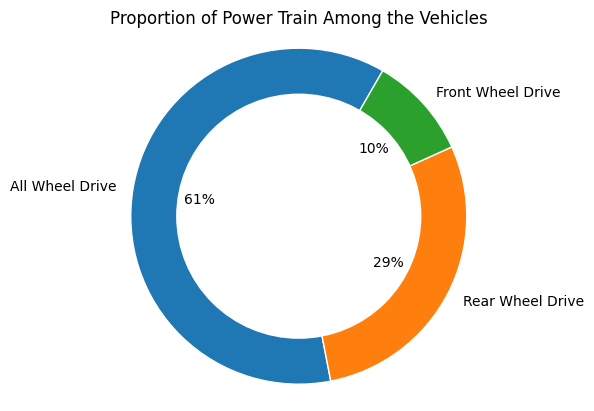

In [195]:
# Match the extracted records with the power train column and visualize in a doughnut chart
pwrtrans = round(slct_flt['PowerTrain'].value_counts('Score'),2)
data = pwrtrans  
pp.pie(data, labels=pwrtrans.index, autopct='%1.0f%%', startangle=60, wedgeprops={'edgecolor': 'white'})
centre_circle = pp.Circle((0,0),0.73,fc='white')
fig = pp.gcf()
fig.gca().add_artist(centre_circle)
pp.axis('equal')
pp.title('Proportion of Power Train Among the Vehicles')
pp.show()

In [196]:
# Concatenate 'BrandModel' with the 'PowerTrain columns'
slct_flt['BrandModel_PowerTrain'] = slct_flt['BrandModel'].str.cat(slct_flt['PowerTrain'],sep=': ')
slct_flt.drop(columns = ['BrandModel','PowerTrain'],axis=1,inplace=True)
slct_flt

,Price (€),Range (km),Accelaration (sec),Seats,Efficiency (Wh/km),TopSpeed (km/hr),FastCharge (km/hr),Score,BrandModel_PowerTrain
0,0.457600,0.31875,0.159664,0.000000,0.550296,0.442509,0.935065,18,Ford Mustang Mach-E ER RWD: Rear Wheel Drive
1,0.304386,0.24375,0.302521,0.333333,0.786982,0.268293,0.545455,18,Audi e-tron 55 quattro: All Wheel Drive
2,0.389596,0.20625,0.201681,0.333333,0.911243,0.303136,0.480519,18,Fiat 500e Convertible: Front Wheel Drive
3,0.191773,0.31250,0.302521,0.333333,0.609467,0.268293,0.428571,18,Skoda Enyaq iV vRS: All Wheel Drive
4,0.378050,0.18750,0.201681,0.333333,0.982249,0.303136,0.441558,18,Tesla Cybertruck Single Motor: Rear Wheel Drive
5,0.225128,0.27500,0.285714,0.333333,0.828402,0.233449,0.376623,18,Skoda Enyaq iV 80X: All Wheel Drive
6,0.214865,0.28750,0.453782,0.333333,0.792899,0.233449,0.402597,18,Byton M-Byte 72 kWh 2WD: Rear Wheel Drive
7,0.315645,0.26250,0.302521,0.333333,0.733728,0.268293,0.571429,18,Audi e-tron Sportback 55 quattro: All Wheel D...
8,0.281576,0.72500,0.075630,0.666667,0.964497,0.303136,0.701299,18,Tesla Cybertruck Tri Motor: All Wheel Drive
9,0.197520,0.31875,0.252101,1.000000,0.396450,0.327526,0.987013,18,Tesla Model Y Long Range Dual Motor: All Whee...


In [197]:
# Filter only vehicles that scored 17
slct_flt_17 = slct_flt[slct_flt['Score']==17]
slct_flt_17

,Price (€),Range (km),Accelaration (sec),Seats,Efficiency (Wh/km),TopSpeed (km/hr),FastCharge (km/hr),Score,BrandModel_PowerTrain
10,0.153286,0.33750,0.462185,0.333333,0.556213,0.128920,0.454545,17,Tesla Model Y Long Range Performance: All Whe...
11,0.176250,0.35000,0.411765,0.333333,0.568047,0.198606,0.337662,17,Jaguar I-Pace : All Wheel Drive
12,0.178944,0.28750,0.352941,0.333333,0.526627,0.198606,0.480519,17,Audi Q4 e-tron : All Wheel Drive
13,0.219484,0.32500,0.327731,0.333333,0.621302,0.198606,0.311688,17,Tesla Cybertruck Dual Motor: All Wheel Drive
14,0.127628,0.28750,0.411765,0.333333,0.526627,0.128920,0.480519,17,Ford Mustang Mach-E ER AWD: All Wheel Drive
15,0.666446,0.26875,0.117647,0.000000,0.668639,0.442509,0.779221,17,BMW i3s 120 Ah: Rear Wheel Drive
16,0.127628,0.22500,0.243697,0.333333,0.396450,0.268293,0.350649,17,Mercedes EQA : All Wheel Drive
17,0.140457,0.28750,0.344538,0.333333,0.526627,0.198606,0.480519,17,Mercedes EQV 300 Long: Front Wheel Drive
18,0.538156,0.31875,0.117647,0.000000,0.550296,0.407666,0.883117,17,Audi e-tron GT : All Wheel Drive
19,0.153286,0.19375,0.319328,0.333333,0.532544,0.268293,0.350649,17,Volkswagen ID.3 Pro Performance: Rear Wheel D...


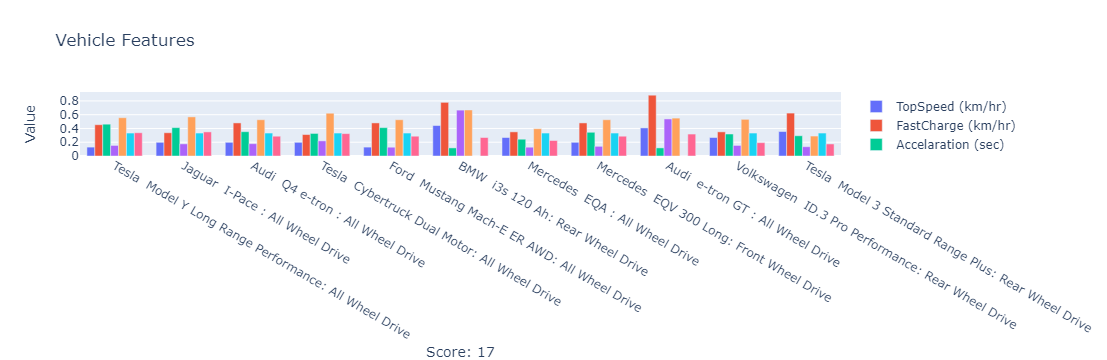

In [198]:
# Visualize the features of vehicles that scored 17 with respect to their power train system
# create traces for each bar
trace1 = go.Bar(x=slct_flt_17['BrandModel_PowerTrain'], y=slct_flt_17["TopSpeed (km/hr)"], name='TopSpeed (km/hr)')
trace2 = go.Bar(x=slct_flt_17['BrandModel_PowerTrain'], y=slct_flt_17["FastCharge (km/hr)"], name='FastCharge (km/hr)')
trace3 = go.Bar(x=slct_flt_17['BrandModel_PowerTrain'], y=slct_flt_17["Accelaration (sec)"], name='Accelaration (sec)')
trace4 = go.Bar(x=slct_flt_17['BrandModel_PowerTrain'], y=slct_flt_17["Price (€)"], name='Price (€)')
trace5 = go.Bar(x=slct_flt_17['BrandModel_PowerTrain'], y=slct_flt_17["Efficiency (Wh/km)"], name='Efficiency (Wh/km)')
trace6 = go.Bar(x=slct_flt_17['BrandModel_PowerTrain'], y=slct_flt_17["Seats"], name='Seats')
trace7 = go.Bar(x=slct_flt_17['BrandModel_PowerTrain'], y=slct_flt_17["Range (km)"], name='Range (km)')
layout = go.Layout(title='Vehicle Features',
                   xaxis=dict(title='Score: 17'),
                   yaxis=dict(title='Value'))
fig = go.Figure(data=[trace1,trace2,trace3,trace4,trace5,trace6,trace7], layout=layout)
fig.show()

In [199]:
## Filter only vehicles that scored 18
slct_flt_18 = slct_flt[slct_flt['Score']==18]
slct_flt_18

,Price (€),Range (km),Accelaration (sec),Seats,Efficiency (Wh/km),TopSpeed (km/hr),FastCharge (km/hr),Score,BrandModel_PowerTrain
0,0.457600,0.31875,0.159664,0.000000,0.550296,0.442509,0.935065,18,Ford Mustang Mach-E ER RWD: Rear Wheel Drive
1,0.304386,0.24375,0.302521,0.333333,0.786982,0.268293,0.545455,18,Audi e-tron 55 quattro: All Wheel Drive
2,0.389596,0.20625,0.201681,0.333333,0.911243,0.303136,0.480519,18,Fiat 500e Convertible: Front Wheel Drive
3,0.191773,0.31250,0.302521,0.333333,0.609467,0.268293,0.428571,18,Skoda Enyaq iV vRS: All Wheel Drive
4,0.378050,0.18750,0.201681,0.333333,0.982249,0.303136,0.441558,18,Tesla Cybertruck Single Motor: Rear Wheel Drive
5,0.225128,0.27500,0.285714,0.333333,0.828402,0.233449,0.376623,18,Skoda Enyaq iV 80X: All Wheel Drive
6,0.214865,0.28750,0.453782,0.333333,0.792899,0.233449,0.402597,18,Byton M-Byte 72 kWh 2WD: Rear Wheel Drive
7,0.315645,0.26250,0.302521,0.333333,0.733728,0.268293,0.571429,18,Audi e-tron Sportback 55 quattro: All Wheel D...
8,0.281576,0.72500,0.075630,0.666667,0.964497,0.303136,0.701299,18,Tesla Cybertruck Tri Motor: All Wheel Drive
9,0.197520,0.31875,0.252101,1.000000,0.396450,0.327526,0.987013,18,Tesla Model Y Long Range Dual Motor: All Whee...


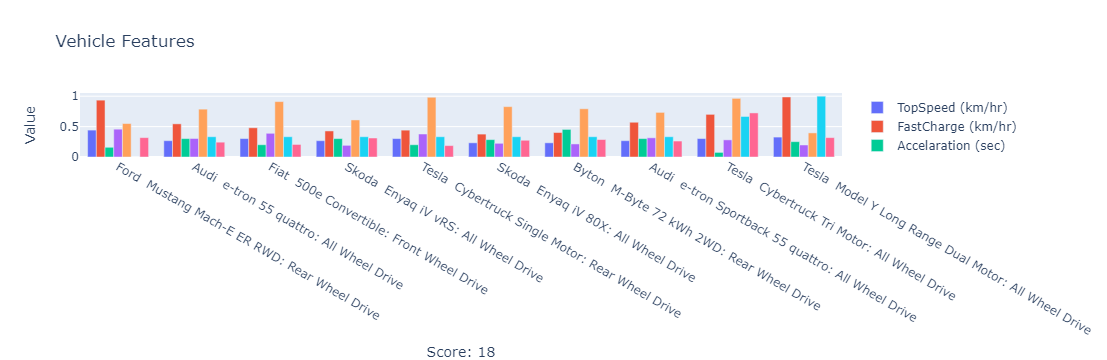

In [200]:
# Visualize the features of vehicles that scored 18 with respect to their power train system
# create traces for each bar
trace1 = go.Bar(x=slct_flt_18['BrandModel_PowerTrain'], y=slct_flt_18["TopSpeed (km/hr)"], name='TopSpeed (km/hr)')
trace2 = go.Bar(x=slct_flt_18['BrandModel_PowerTrain'], y=slct_flt_18["FastCharge (km/hr)"], name='FastCharge (km/hr)')
trace3 = go.Bar(x=slct_flt_18['BrandModel_PowerTrain'], y=slct_flt_18["Accelaration (sec)"], name='Accelaration (sec)')
trace4 = go.Bar(x=slct_flt_18['BrandModel_PowerTrain'], y=slct_flt_18["Price (€)"], name='Price (€)')
trace5 = go.Bar(x=slct_flt_18['BrandModel_PowerTrain'], y=slct_flt_18["Efficiency (Wh/km)"], name='Efficiency (Wh/km)')
trace6 = go.Bar(x=slct_flt_18['BrandModel_PowerTrain'], y=slct_flt_18["Seats"], name='Seats')
trace7 = go.Bar(x=slct_flt_18['BrandModel_PowerTrain'], y=slct_flt_18["Range (km)"], name='Range (km)')
layout = go.Layout(title='Vehicle Features',
                   xaxis=dict(title='Score: 18'),
                   yaxis=dict(title='Value'))
fig = go.Figure(data=[trace1,trace2,trace3,trace4,trace5,trace6,trace7], layout=layout)
fig.show()

In [201]:
# Recalling that
X = norm_ecars[feature_columns]
y = norm_ecars[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
rf_model = RandomForestRegressor(n_estimators=1000, random_state=123)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=123)

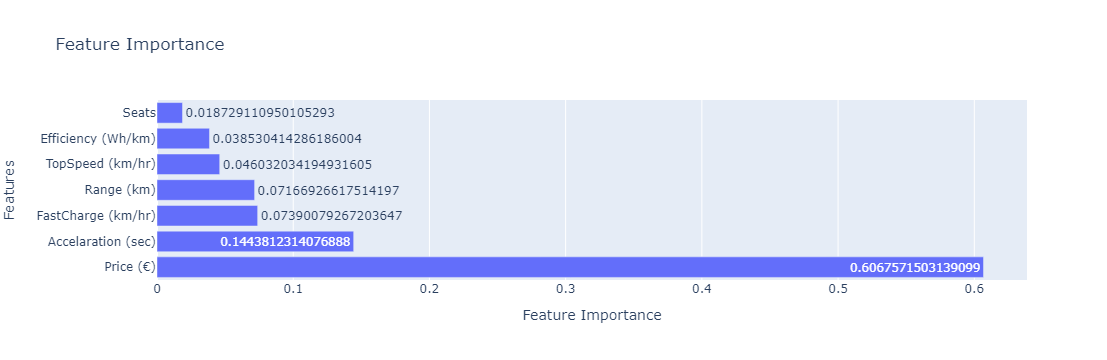

In [202]:
# Get the feature importance scores and create a dataframe for visualization
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
fig = px.bar(importance_df, x='Importance', y='Feature', orientation='h', title='Feature Importance',
             labels={'Importance': 'Importance', 'Feature': 'Vehicle Features'})
fig.update_layout(xaxis_title='Feature Importance', yaxis_title='Features', showlegend=False)
fig.update_traces(text=importance_df['Importance'], textposition='auto')
fig.show()

In [203]:
# Sort the DataFrame by 'Range', 'FastCharge', 'TopSpeed' in descending order and 'Price' in ascending order
sorted_df = slct_flt.sort_values(by='Price (€)', ascending= True, ignore_index=True)
sorted_df.head(10)

,Price (€),Range (km),Accelaration (sec),Seats,Efficiency (Wh/km),TopSpeed (km/hr),FastCharge (km/hr),Score,BrandModel_PowerTrain
0,0.127628,0.22500,0.243697,0.333333,0.396450,0.268293,0.350649,17,Mercedes EQA : All Wheel Drive
1,0.127628,0.28750,0.411765,0.333333,0.526627,0.128920,0.480519,17,Ford Mustang Mach-E ER AWD: All Wheel Drive
2,0.134710,0.17500,0.294118,0.333333,0.289941,0.355401,0.623377,17,Tesla Model 3 Standard Range Plus: Rear Wheel...
3,0.140457,0.28750,0.344538,0.333333,0.526627,0.198606,0.480519,17,Mercedes EQV 300 Long: Front Wheel Drive
4,0.153286,0.19375,0.319328,0.333333,0.532544,0.268293,0.350649,17,Volkswagen ID.3 Pro Performance: Rear Wheel D...
5,0.153286,0.33750,0.462185,0.333333,0.556213,0.128920,0.454545,17,Tesla Model Y Long Range Performance: All Whe...
6,0.176250,0.35000,0.411765,0.333333,0.568047,0.198606,0.337662,17,Jaguar I-Pace : All Wheel Drive
7,0.178944,0.28750,0.352941,0.333333,0.526627,0.198606,0.480519,17,Audi Q4 e-tron : All Wheel Drive
8,0.191773,0.31250,0.302521,0.333333,0.609467,0.268293,0.428571,18,Skoda Enyaq iV vRS: All Wheel Drive
9,0.197520,0.31875,0.252101,1.000000,0.396450,0.327526,0.987013,18,Tesla Model Y Long Range Dual Motor: All Whee...


In [204]:
fleet_price = sorted_df[['BrandModel_PowerTrain','Price (€)']]
fleet_price

,BrandModel_PowerTrain,Price (€)
0,Mercedes EQA : All Wheel Drive,0.127628
1,Ford Mustang Mach-E ER AWD: All Wheel Drive,0.127628
2,Tesla Model 3 Standard Range Plus: Rear Wheel...,0.134710
3,Mercedes EQV 300 Long: Front Wheel Drive,0.140457
4,Volkswagen ID.3 Pro Performance: Rear Wheel D...,0.153286
5,Tesla Model Y Long Range Performance: All Whe...,0.153286
6,Jaguar I-Pace : All Wheel Drive,0.176250
7,Audi Q4 e-tron : All Wheel Drive,0.178944
8,Skoda Enyaq iV vRS: All Wheel Drive,0.191773
9,Tesla Model Y Long Range Dual Motor: All Whee...,0.197520


In [206]:
# Split the 'BrandModel_PowerTrain' into 'BrandModel' and 'PowerTrain'
fleet_price[['BrandModel', 'PowerTrain']] = fleet_price['BrandModel_PowerTrain'].str.split(':', expand=True)

# Further split 'BrandModel' into 'Brand' and 'Model'
fleet_price[['Brand', 'Model']] = fleet_price['BrandModel'].str.split(' ', 1, expand=True)
fleet_price

,BrandModel_PowerTrain,Price (€),BrandModel,PowerTrain,Brand,Model
0,Mercedes EQA : All Wheel Drive,0.127628,Mercedes EQA,All Wheel Drive,Mercedes,EQA
1,Ford Mustang Mach-E ER AWD: All Wheel Drive,0.127628,Ford Mustang Mach-E ER AWD,All Wheel Drive,Ford,Mustang Mach-E ER AWD
2,Tesla Model 3 Standard Range Plus: Rear Wheel...,0.134710,Tesla Model 3 Standard Range Plus,Rear Wheel Drive,Tesla,Model 3 Standard Range Plus
3,Mercedes EQV 300 Long: Front Wheel Drive,0.140457,Mercedes EQV 300 Long,Front Wheel Drive,Mercedes,EQV 300 Long
4,Volkswagen ID.3 Pro Performance: Rear Wheel D...,0.153286,Volkswagen ID.3 Pro Performance,Rear Wheel Drive,Volkswagen,ID.3 Pro Performance
5,Tesla Model Y Long Range Performance: All Whe...,0.153286,Tesla Model Y Long Range Performance,All Wheel Drive,Tesla,Model Y Long Range Performance
6,Jaguar I-Pace : All Wheel Drive,0.176250,Jaguar I-Pace,All Wheel Drive,Jaguar,I-Pace
7,Audi Q4 e-tron : All Wheel Drive,0.178944,Audi Q4 e-tron,All Wheel Drive,Audi,Q4 e-tron
8,Skoda Enyaq iV vRS: All Wheel Drive,0.191773,Skoda Enyaq iV vRS,All Wheel Drive,Skoda,Enyaq iV vRS
9,Tesla Model Y Long Range Dual Motor: All Whee...,0.197520,Tesla Model Y Long Range Dual Motor,All Wheel Drive,Tesla,Model Y Long Range Dual Motor


In [207]:
# Create a new dataframe by adding powertain and branmodel columns to the normalized dataset
Brands['BrandModel'] = Brands['Brand'].str.cat(Brands['Model'],sep = ' ')
brand_df = Brands[['BrandModel','Model','PriceRange']]
brand_df

,BrandModel,Model,PriceRange
0,Tesla Roadster,Roadster,NaN
1,Porsche Taycan Turbo S,Taycan Turbo S,NaN
2,Porsche Taycan Cross Turismo,Taycan Cross Turismo,100000-150000
3,Lightyear One,One,100000-150000
4,Porsche Taycan Turbo,Taycan Turbo,100000-150000
...,...,...,...
92,Opel Corsa-e,Corsa-e,20000-60000
93,Sono Sion,Sion,20000-60000
94,Skoda CITIGOe iV,CITIGOe iV,20000-60000
95,Volkswagen e-Up!,e-Up!,20000-60000


In [209]:
# Merging the dataframes based on 'BrandModel'
selected_fleet_price = pd.merge(fleet_price, brand_df, on='BrandModel', how='inner')
selected_fleet_price[['BrandModel','PowerTrain','Price (€)','PriceRange']].sort_values(by='Price (€)',ascending=True)

,BrandModel,PowerTrain,Price (€),PriceRange
0,Mercedes EQA,All Wheel Drive,0.127628,20000-60000
1,Ford Mustang Mach-E ER AWD,All Wheel Drive,0.127628,60000-100000
2,Tesla Model 3 Standard Range Plus,Rear Wheel Drive,0.134710,20000-60000
3,Mercedes EQV 300 Long,Front Wheel Drive,0.140457,60000-100000
4,Volkswagen ID.3 Pro Performance,Rear Wheel Drive,0.153286,20000-60000
5,Tesla Model Y Long Range Performance,All Wheel Drive,0.153286,60000-100000
6,Jaguar I-Pace,All Wheel Drive,0.176250,60000-100000
7,Audi Q4 e-tron,All Wheel Drive,0.178944,20000-60000
8,Skoda Enyaq iV vRS,All Wheel Drive,0.191773,20000-60000
9,Tesla Model Y Long Range Dual Motor,All Wheel Drive,0.197520,20000-60000


In [210]:
top10_most_affordable_fleet = selected_fleet_price[['BrandModel','PowerTrain','Price (€)','PriceRange']].sort_values(by='Price (€)',ascending=True).head(10)
top10_most_affordable_fleet

,BrandModel,PowerTrain,Price (€),PriceRange
0,Mercedes EQA,All Wheel Drive,0.127628,20000-60000
1,Ford Mustang Mach-E ER AWD,All Wheel Drive,0.127628,60000-100000
2,Tesla Model 3 Standard Range Plus,Rear Wheel Drive,0.134710,20000-60000
3,Mercedes EQV 300 Long,Front Wheel Drive,0.140457,60000-100000
4,Volkswagen ID.3 Pro Performance,Rear Wheel Drive,0.153286,20000-60000
5,Tesla Model Y Long Range Performance,All Wheel Drive,0.153286,60000-100000
6,Jaguar I-Pace,All Wheel Drive,0.176250,60000-100000
7,Audi Q4 e-tron,All Wheel Drive,0.178944,20000-60000
8,Skoda Enyaq iV vRS,All Wheel Drive,0.191773,20000-60000
9,Tesla Model Y Long Range Dual Motor,All Wheel Drive,0.197520,20000-60000
